In [1]:
## 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## fashion mnist 데이터셋 내려받기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()    # load_data()메서드 사용해서 데이터 받기

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


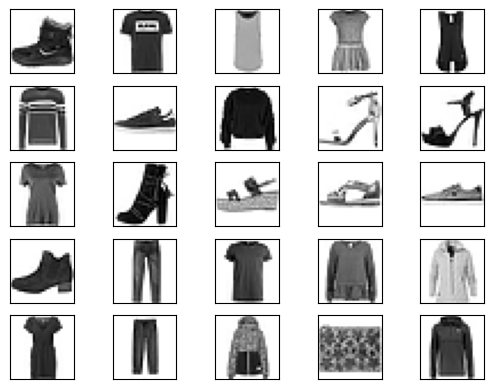

In [3]:
## 분류에 사용될 클래스 정의
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [4]:
## 심층 신경망을 이용한 모델 생성 및 훈련
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # A
    tf.keras.layers.Dense(128, activation='relu'), # B
    tf.keras.layers.Dropout(0.2), # C
    tf.keras.layers.Dense(10, activation='softmax') # D
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) #E

model.fit(x_train, y_train, epochs=5)     # 훈련 데이터셋을 이용하여 모델 훈련
model.evaluate(x_test, y_test, verbose=2) # 검증 데이터셋을 이용하여 모델 평가

## 심층 신경망에 대한 모델 생성과 성능 평가

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7675 - loss: 0.6704
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8505 - loss: 0.4083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8661 - loss: 0.3676
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8765 - loss: 0.3365
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8806 - loss: 0.3239
313/313 - 1s - 2ms/step - accuracy: 0.8641 - loss: 0.3648


[0.3648378849029541, 0.8640999794006348]

A. CNN에서 합성곱층이나 최대 풀링층을 거치면 주요 특징만 추출되고 완전 연결층에 전달됩니다. 합성곱층이나 최대 풀링층은 2차원 데이터를 다루지만, 이 데이터를 완전연결층에 전달할 때는 1차원으로 바꾸어야 합니다. 이때 사용되는 것이 flatten입니다. 여기에서 ConvNet를 사용하지는 않지만 이미지를 1차원 데이터로 변형하기 위해 사용합니다.

B. 합성곱층에서 특성 맵을 만들고, 풀링층에서는 차원을 감소시킵니다. 차원이 감소된 특성 맵은 밀집층(dense layer)의 입력으로 사용되고 그 결과가 출력층과 연결됩니다. 여기에서는 입력층과 출력층을 연결하기 위해서 밀집층(dense)를 사용합니다.
단순한 심층 신경망에서는 이미지의 공간적 특성들이 무시되는 단점이 있습니다. 하지만 합성곱 신경망에서 밀집층을 사용하게 되면 밀집층 직전의 입력과 그 후의 출력만 완전연결층으로 만들기 때문에 이미지의 공간 정보를 유지할 수 있습니다.

128 => 은닉층이 갖는 뉴런의 개수를 의미
activation => 활성화 함수

C. 과적합을 방지하기 위한 방법으로 특정 노드를 0으로 만듭니다. (0.2)는 입력 데이터의 20% 노드들을 무작위로 0으로 만들라는 의미.

D. 출력층의 노드 개수는 10개, 활성화 함수는 소프트맥스

E. compile에서 사용하는 주요 파라미터

optimizer => 옵티마이저란 손실 함수를 사용하여 구한 값으로 기울기를 구하고 네트워크(신경망)의 파라미터(W,b)를 학습에 어떻게 반영할지 결정하는 방법으로, 여기에는 adam을 사용

loss => 최적화 과정에서 사용될 손실 함수를 설정. 여기에는 운동화, 셔츠 등 다수의 클래스를 사용하기 때문에 'sparse_categorical_crossentropy' 손실 함수 사용

metrics => 모델의 평가 기준을 지정

In [5]:
## 데이터 전처리
## 0 ~ 255 범위의 픽셀 값을 갖는 기본 이미지 데이터를 0 ~ 1 범위의 픽셀 값을 갖도록함

X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [ ]:
## 합성곱 네트워크를 이용한 모델 생성

model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                           input_shape = (28, 28, 1)),  # A
    tf.keras.layers.MaxPooling2D((2,2), strides=2), # B
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # C
])

model_with_conv.compile(optimizer = 'adam',
                        loss = 'sparse_categorical_crossentropy',
                        metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


신경망은 Conv와 MaxPooling의 쌍으로 구성됩니다.

A. 첫 번째 층은 입력 이미지에 적용되는 합성곱층으로 필터는 (3, 3)이며, 패딩을 사용하여 원래 이미지 크기를 유지합니다.

32 => 합성곱 필터 개수

(3, 3) = > 합성곱 커널의 행과 열

padding = 'same' => 경계 처리 방법
-valid : 유효한 영역만 출력되므로 출력 이미지 크기는 입력 이미지 크기보다 작습니다.
-same : 출력 이미지 크기가 입력 이미지 크기와 동일합니다.

activation='relu' => 활성화 함수 설정

input_shape => 입력 데이터의 형태를 정의합니다. 모델에서 첫 계층만 정의하면 됩니다. (행, 열, 채널 개수)로 정의하며, 그레이스케일 영상은 채널을 1로 설정하고 컬러는 3으로 설정합니다.

B. 풀링층은 필터 크기가 (2, 2)이고 스트라이드가 2입니다.

C. 소프트맥스 활성화 함수가 적용된 출력층

In [ ]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.4681 - loss: 1.4232
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7659 - loss: 0.6306
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7904 - loss: 0.5684
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.8087 - loss: 0.5300
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.8196 - loss: 0.5014
313/313 - 4s - 14ms/step - accuracy: 0.8154 - loss: 0.5148


[0.5148323178291321, 0.8154000043869019]